# Traffic Accident Prediction using Decision Trees

## 1. Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay)
from sklearn.preprocessing import LabelEncoder

## 2. Load and Preprocess Data

In [6]:
# 1. Load data
df = pd.read_csv(r'C:\Users\PC\Downloads\CodTech\dataset_traffic_accident_prediction1.csv')

# 2. Check for missing values IN TARGET FIRST
print("Missing values in target:", df.iloc[:, -1].isna().sum())

# 3. Remove rows with missing target values (CRUCIAL BEFORE SPLITTING)
df_clean = df.dropna(subset=[df.columns[-1]])

# 4. Now create X and y from CLEANED data
X = df_clean.iloc[:, :-1]  # All columns except last
y = df_clean.iloc[:, -1]   # Last column (accident)

# 5. Then handle CATEGORICAL FEATURES (after cleaning)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
if categorical_cols:
    le = LabelEncoder()
    for col in categorical_cols:
        X[col] = le.fit_transform(X[col])

Missing values in target: 42


## 3. Dataset Exploration

In [9]:
print("\nCleaned data shape:", X.shape)
print("Class distribution after cleaning:")
print(y.value_counts(normalize=True))


Cleaned data shape: (798, 13)
Class distribution after cleaning:
Accident
0.0    0.700501
1.0    0.299499
Name: proportion, dtype: float64


## 4. Split Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y  # Important for imbalanced classes
)

## 5. Build and Train Model

In [15]:
model = DecisionTreeClassifier(
    max_depth=3,              # Smaller for interpretability
    min_samples_split=10,     # Prevent overfitting
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_split=10, random_state=42)

## 6. Evaluate Model

Accuracy: 0.43

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.24      0.37       168
         1.0       0.33      0.88      0.48        72

    accuracy                           0.43       240
   macro avg       0.57      0.56      0.42       240
weighted avg       0.67      0.43      0.40       240



<Figure size 800x600 with 0 Axes>

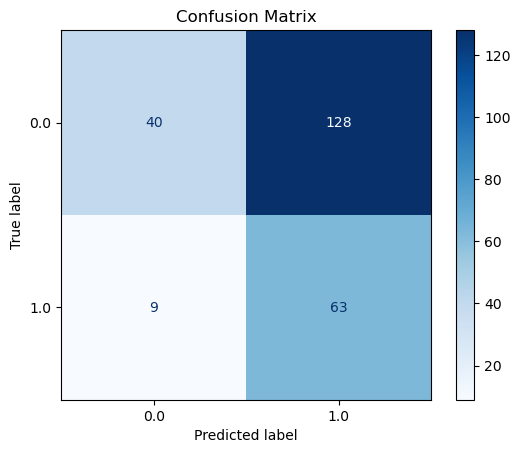

In [18]:
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## 7. Visualize Decision Tree

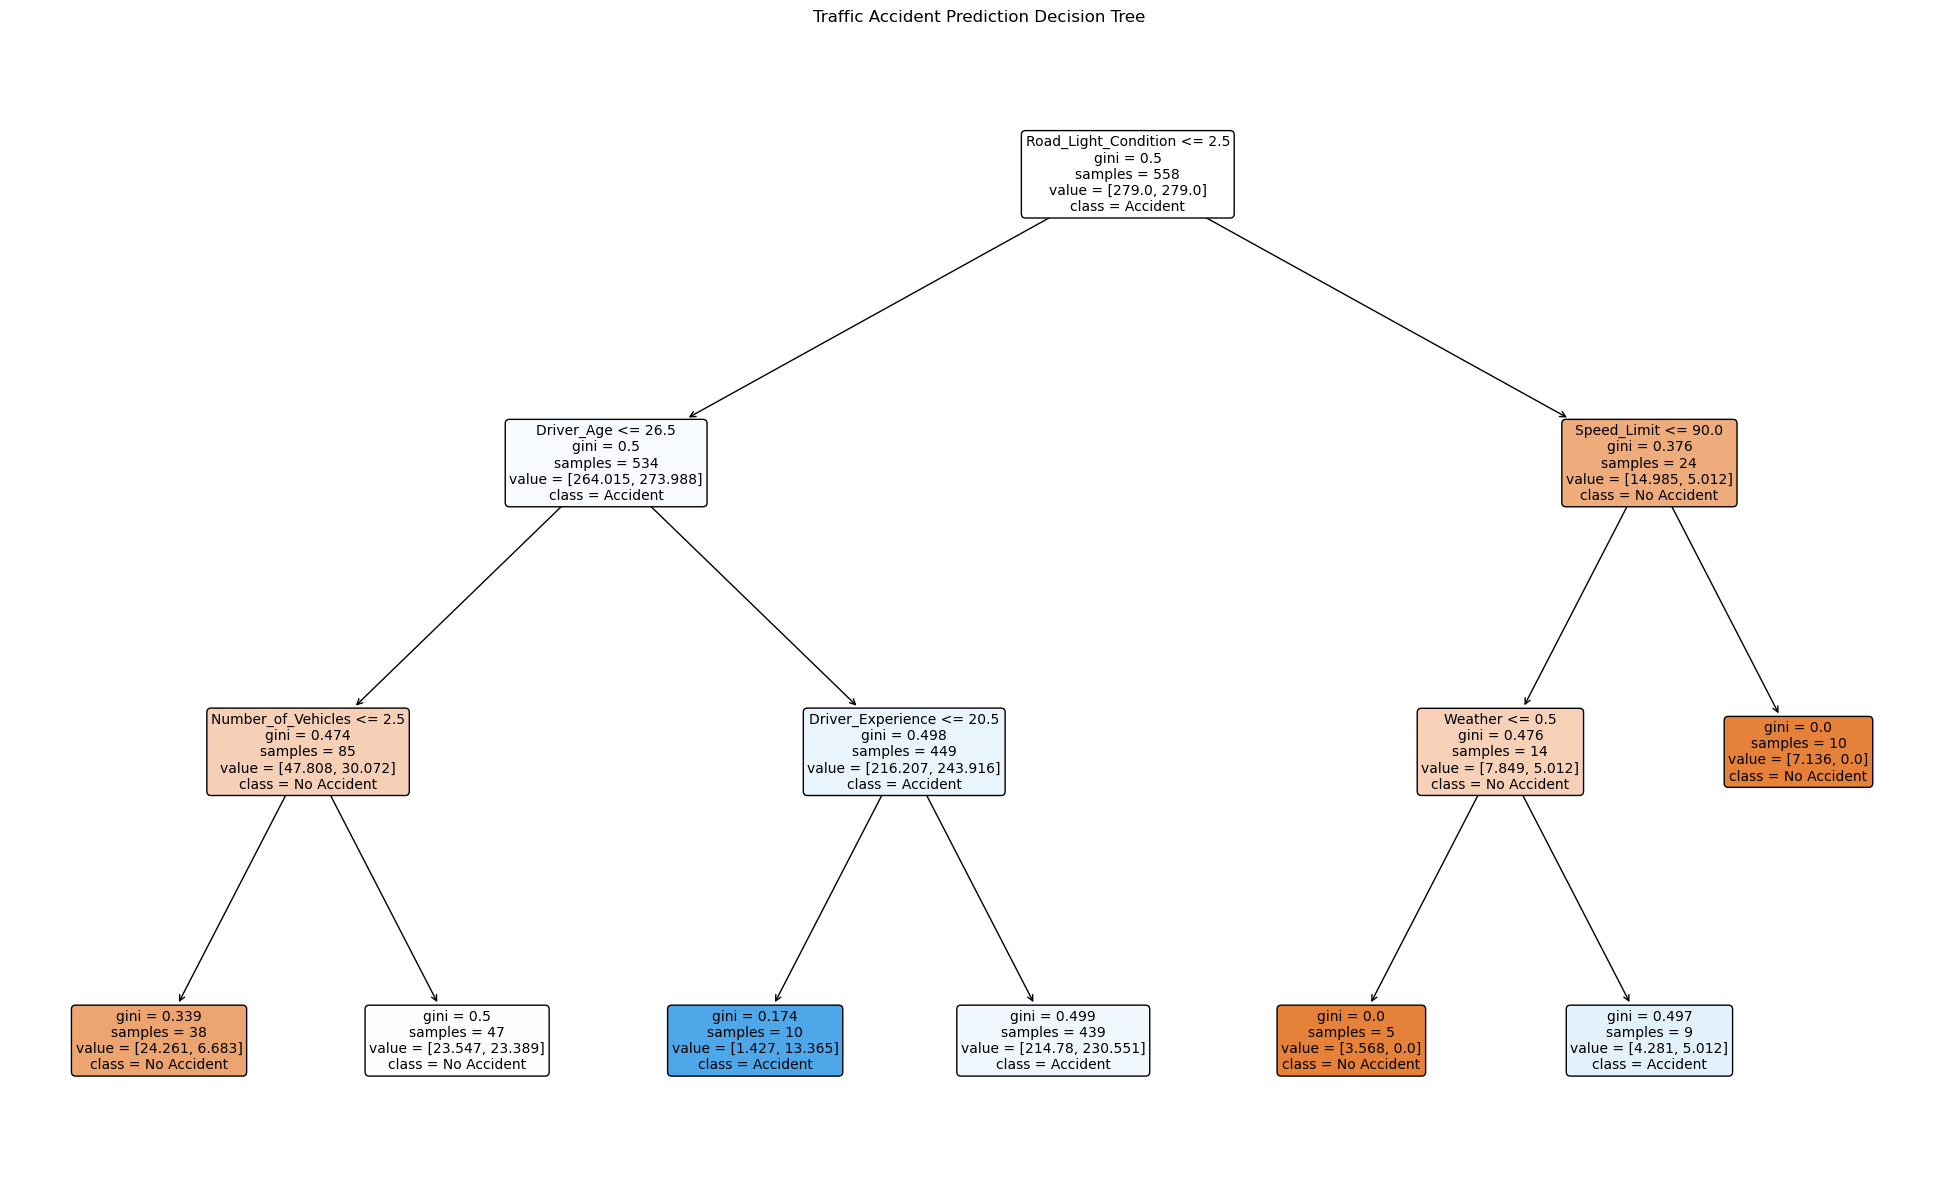

In [21]:
plt.figure(figsize=(25, 15))
plot_tree(
    model,
    feature_names=X.columns.tolist(),  # Auto-fetch feature names
    class_names=['No Accident', 'Accident'],  # Verify your classes
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Traffic Accident Prediction Decision Tree")
plt.show()

## 8. Feature Importance

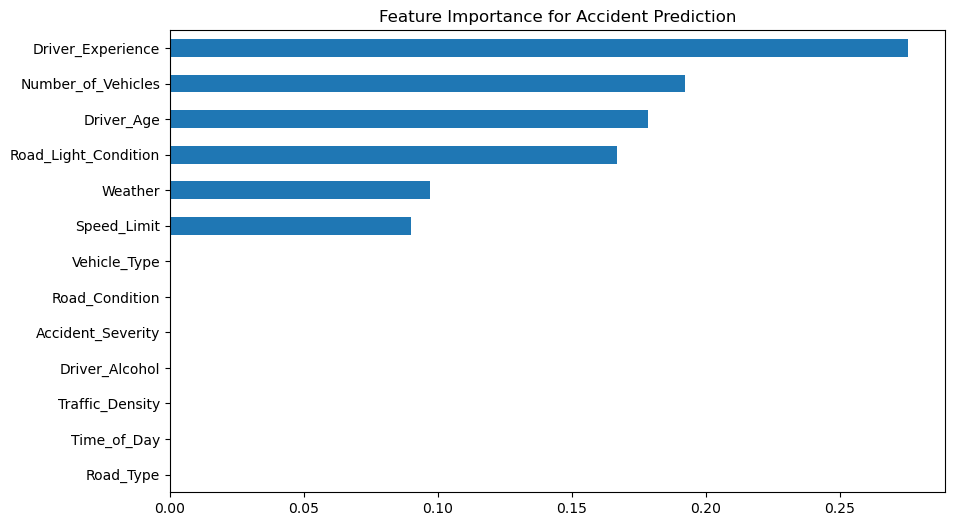

In [24]:
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
importances.sort_values().plot.barh()
plt.title('Feature Importance for Accident Prediction')
plt.show()